# HW3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def safelog(x):
    return(np.log(x + 1e-100))

# Importing Data

In [2]:
# read data into memory
data_set1 = np.genfromtxt("hw03_data_set_images.csv", delimiter = ",")
data_set2 = np.genfromtxt("hw03_data_set_labels.csv",dtype=str)
# get X and y values
for i in range(data_set2.shape[0]):
    data_set2[i] = ord(data_set2[i].split("\"")[1])-64

k=0
m=25
n=39
train_set = np.empty((0,320), int)
test_set = np.empty((0,320), int)
train_truth = np.empty((0), int)
test_truth = np.empty((0), int)
for i in range(0,5):
    train_set = np.append(train_set, data_set1[k:m], axis=0)
    test_set = np.append(test_set, data_set1[m:n], axis=0)
    train_truth = np.append(train_truth, data_set2[k:m], axis=0).astype(int)
    test_truth = np.append(test_truth, data_set2[m:n], axis=0).astype(int)
    k = k+39
    m = m+39
    n = n+39
    
# get number of classes and number of samples
K = np.max(train_truth)
N = train_truth.shape[0]

# Parameter Estimation

In [3]:
class_priors = [np.mean(train_truth == (i+1)) for i in range(K)]
means = [np.mean(train_set[train_truth == i+1],axis=0) for i in range(K)]
means = np.array(means)

In [4]:
class_priors

[0.2, 0.2, 0.2, 0.2, 0.2]

# Plots

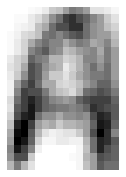

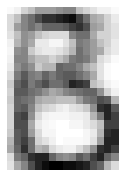

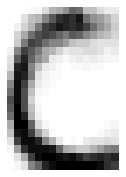

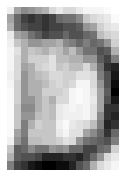

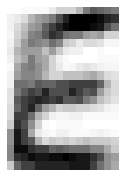

In [5]:
# plot objective function during iterations
for i in range(K):
    plt.figure(figsize = (2, 3))
    sns.heatmap(np.transpose(means[i].reshape(16,20)), cmap ='Greys', cbar=False)
    plt.xticks([])
    plt.yticks([])
    plt.show()


# Score Function

In [6]:
def calc_score(sets, means):
    score = np.empty((sets.shape[0],K), float)
    for i in range(K):
        for j in range(sets.shape[0]):
            score[j][i] = np.sum(sets[j]*safelog(means[i]) + (1-sets[j])*safelog(1-means[i])) + safelog(class_priors[i])
    return score

# Training Set Performance

In [7]:
# calculate confusion matrix
Y_predicted = calc_score(train_set, means)
y_predicted = np.argmax(Y_predicted, axis = 1) + 1 
confusion_matrix = pd.crosstab(y_predicted, train_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  24   1   0   1
3         0   0  24   0   0
4         0   1   0  25   0
5         0   0   0   0  24


# Test Set Performance

In [8]:
# calculate confusion matrix
Y_predicted = calc_score(test_set, means)
y_predicted = np.argmax(Y_predicted, axis = 1) + 1 
confusion_matrix = pd.crosstab(y_predicted, test_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth  1   2  3   4   5
y_pred                   
1        7   0  0   0   0
2        0  11  3   2   4
3        0   0  7   0   0
4        7   3  3  12   0
5        0   0  1   0  10
